<a href="https://colab.research.google.com/github/kimminju99/Cifar-10_image_classification/blob/main/confusion%20matrix_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from keras.datasets import cifar10
from matplotlib import pyplot
import tensorflow.keras.optimizers as Optimizer
from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [3]:
def show_accuracy(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, color = 'red', label='Training Accuracy')
    plt.plot(epochs_range, val_acc, color = 'blue', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, color = 'red', label='Training Loss')
    plt.plot(epochs_range, val_loss, color = 'blue', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("--- Training data ---")
print("Number of examples : ", x_train.shape[0])
print("Number of channels : ", x_train.shape[3])
print("Image size : ", x_train.shape[1], x_train.shape[2])

print("--- Test data ---")
print("Number of examples : ", x_test.shape[0])
print("Number of channels : ", x_test.shape[3])
print("Image size : ", x_test.shape[1], x_test.shape[2])
input_shape = x_train.shape[1:]


170500096/170498071 [==============================] - 3s 0us/step
--- Training data ---
Number of examples :  50000
Number of channels :  3
Image size :  32 32
--- Test data ---
Number of examples :  10000
Number of channels :  3
Image size :  32 32


In [5]:
label =[]
for i in range(0,50000):
  label.append(y_train[i][0])
#print(label)

label_count =[]
for i in range(0,10):
  label_count.append(label.count(i))
print("train : ", label_count)

test_label =[]
for i in range(0,10000):
  test_label.append(y_test[i][0])

test_label_count =[]
for i in range(0,10):
  test_label_count.append(test_label.count(i))
print("test : ", test_label_count)


train :  [5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]
test :  [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


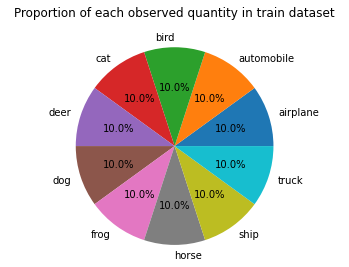

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog','horse','ship','truck']

plt.pie(label_count,
       labels = class_names,
        autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed quantity in train dataset\n')
plt.show()

In [7]:
print("mean before normalization : ", np.mean(x_train))
print("std before normalization : ", np.std(x_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(x_train.shape)
newX_test = np.ones(x_test.shape)

print(x_train.shape)
print(x_test.shape)
print(x_train[0][0][0])

for i in range(3):
    mean[i] = np.mean(x_train[:,:,:,i])
    std[i] = np.std(x_train[:,:,:,i])

for i in range(3):
    newX_train[:,:,:,i] = x_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = x_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
x_train = newX_train
x_test = newX_test

print("mean after normalization : ", np.mean(x_train))
print("std after normalization : ", np.std(x_train))
print("x_train max : ", x_train.max())

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_train[0][0][0])

mean before normalization :  120.70756512369792
std before normalization :  64.1500758911213
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[59 62 63]
mean after normalization :  4.91799193961621e-17
std after normalization :  0.9999999999999996
x_train max :  2.126789409516928
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
[-1.05 -0.98 -0.76]


In [8]:
batch_size = 16
num_classes = 10
epochs = 50
learningRate = 1e-4

img_rows = 32 #input image dimensions
img_cols = 32 

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)

(50000, 10)
(10000, 10)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
model = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    # #layer3
    # layers.Flatten(),
    # layers.Dense(512),
    # # #layers.BatchNormalization(),
    # layers.Activation('relu'),
    # #layers.Dropout(0.5),
    # #layer4

    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation = 'softmax'),
    # layers.Activation('softmax'),
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [10]:
#************** model 뒤에 숫자 넣어주기!!!!! **************
#opt = SGD(learning_rate=1e-3, momentum=0.9)
model.compile(optimizer=Optimizer.Adam(learning_rate=learningRate ), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


Epoch 1/50
3125/3125 [==============================] - 42s 4ms/step - loss: 1.6749 - accuracy: 0.3772 - val_loss: 1.4178 - val_accuracy: 0.4812
Epoch 2/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3881 - accuracy: 0.5012 - val_loss: 1.2650 - val_accuracy: 0.5509
Epoch 3/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2642 - accuracy: 0.5496 - val_loss: 1.1763 - val_accuracy: 0.5792
Epoch 4/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1776 - accuracy: 0.5803 - val_loss: 1.0890 - val_accuracy: 0.6164
Epoch 5/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1123 - accuracy: 0.6053 - val_loss: 1.0722 - val_accuracy: 0.6214
Epoch 6/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0634 - accuracy: 0.6247 - val_loss: 1.0024 - val_accuracy: 0.6419
Epoch 7/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0239 - accuracy: 0.6393 - val_loss: 0.9509 - val_ac

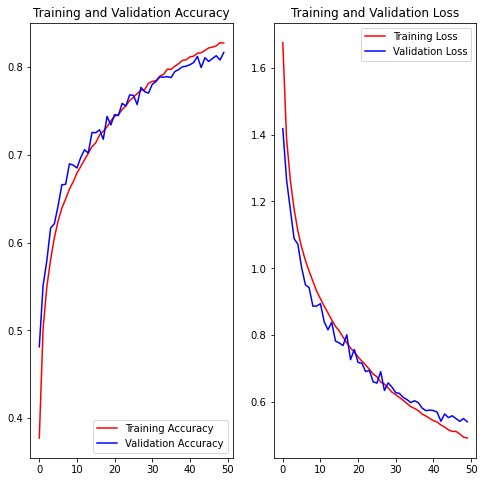

In [11]:
show_accuracy(history)

In [12]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.5411 - accuracy: 0.8165


[0.5410504937171936, 0.8165000081062317]

In [13]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred=model.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


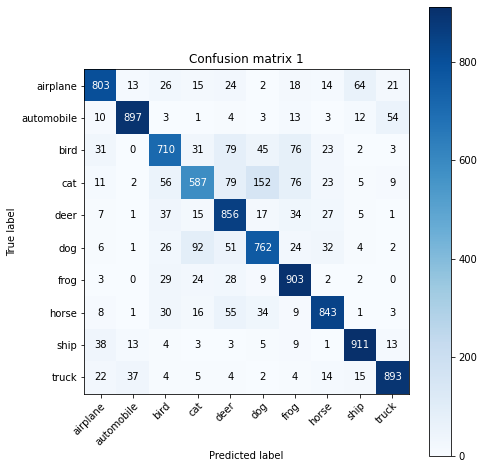

In [14]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix 1')

In [15]:
model2 = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    # #layer3
    # layers.Flatten(),
    # layers.Dense(512),
    # # #layers.BatchNormalization(),
    # layers.Activation('relu'),
    # #layers.Dropout(0.5),
    # #layer4

    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation = 'softmax'),
    # layers.Activation('softmax'),
])


model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)       

In [16]:
#************** model 뒤에 숫자 넣어주기!!!!! **************
#opt = SGD(learning_rate=1e-3, momentum=0.9)
model2.compile(optimizer=Optimizer.Adam(learning_rate=learningRate ), loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


Epoch 1/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.8236 - accuracy: 0.3258 - val_loss: 1.6027 - val_accuracy: 0.4094
Epoch 2/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.5597 - accuracy: 0.4318 - val_loss: 1.4680 - val_accuracy: 0.4605
Epoch 3/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.4469 - accuracy: 0.4763 - val_loss: 1.3918 - val_accuracy: 0.4981
Epoch 4/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.3606 - accuracy: 0.5103 - val_loss: 1.2944 - val_accuracy: 0.5361
Epoch 5/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.2964 - accuracy: 0.5373 - val_loss: 1.2444 - val_accuracy: 0.5603
Epoch 6/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2382 - accuracy: 0.5596 - val_loss: 1.1981 - val_accuracy: 0.5723
Epoch 7/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.1870 - accuracy: 0.5791 - val_loss: 1.1331 - val_ac

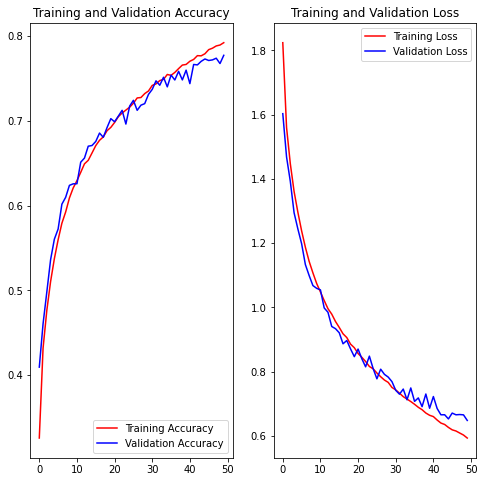

In [17]:
show_accuracy(history2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


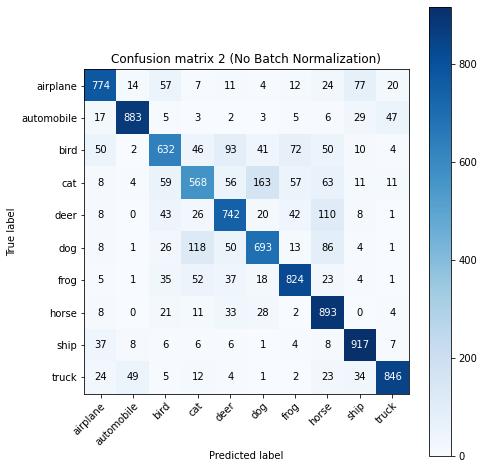

In [18]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred=model2.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix 2 (No Batch Normalization)')

In [19]:
model3 = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(0.2),

    # #layer3
    # layers.Flatten(),
    # layers.Dense(512),
    # # #layers.BatchNormalization(),
    # layers.Activation('relu'),
    # #layers.Dropout(0.5),
    # #layer4

    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation = 'softmax'),
    # layers.Activation('softmax'),
])


model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)       

In [20]:
#************** model 뒤에 숫자 넣어주기!!!!! **************
#opt = SGD(learning_rate=1e-3, momentum=0.9)
model3.compile(optimizer=Optimizer.Adam(learning_rate=learningRate ), loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


Epoch 1/50
3125/3125 [==============================] - 13s 4ms/step - loss: 1.6606 - accuracy: 0.3850 - val_loss: 1.4196 - val_accuracy: 0.4770
Epoch 2/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.3650 - accuracy: 0.5092 - val_loss: 1.2840 - val_accuracy: 0.5411
Epoch 3/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2411 - accuracy: 0.5607 - val_loss: 1.1872 - val_accuracy: 0.5727
Epoch 4/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.1516 - accuracy: 0.5923 - val_loss: 1.1101 - val_accuracy: 0.6048
Epoch 5/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0933 - accuracy: 0.6162 - val_loss: 1.0662 - val_accuracy: 0.6222
Epoch 6/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0392 - accuracy: 0.6349 - val_loss: 0.9866 - val_accuracy: 0.6526
Epoch 7/50
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9942 - accuracy: 0.6494 - val_loss: 1.0625 - val_ac

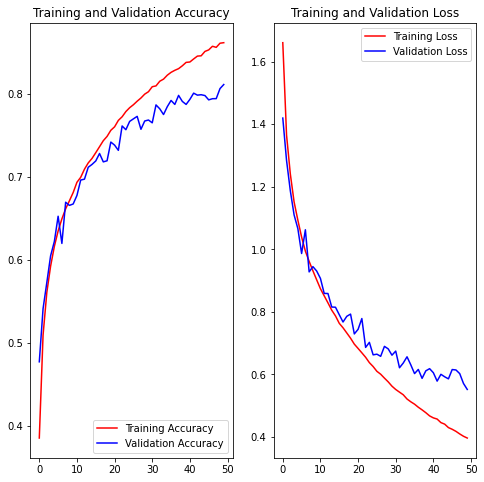

In [21]:
show_accuracy(history3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


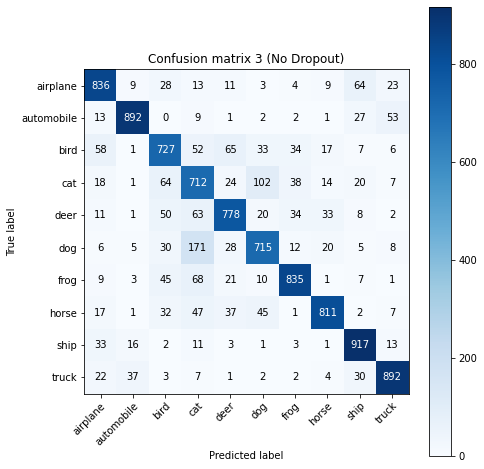

In [22]:
y_pred=model3.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix 3 (No Dropout)')

In [23]:
model4 = keras.Sequential([
    #layer1              
    layers.Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(0.2),

    #layer2
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3), padding='same'),
    #layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #layers.Dropout(0.2),

    # #layer3
    # layers.Flatten(),
    # layers.Dense(512),
    # # #layers.BatchNormalization(),
    # layers.Activation('relu'),
    # #layers.Dropout(0.5),
    # #layer4

    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation = 'softmax'),
    # layers.Activation('softmax'),
])

model4.compile(optimizer=Optimizer.Adam(learning_rate=learningRate), loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

model4.summary()

Epoch 1/50
3125/3125 [==============================] - 12s 4ms/step - loss: 1.7882 - accuracy: 0.3349 - val_loss: 1.5829 - val_accuracy: 0.4245
Epoch 2/50
3125/3125 [==============================] - 11s 3ms/step - loss: 1.5423 - accuracy: 0.4407 - val_loss: 1.5073 - val_accuracy: 0.4576
Epoch 3/50
3125/3125 [==============================] - 11s 3ms/step - loss: 1.4276 - accuracy: 0.4866 - val_loss: 1.3869 - val_accuracy: 0.4989
Epoch 4/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.3483 - accuracy: 0.5160 - val_loss: 1.2980 - val_accuracy: 0.5345
Epoch 5/50
3125/3125 [==============================] - 11s 3ms/step - loss: 1.2715 - accuracy: 0.5472 - val_loss: 1.2242 - val_accuracy: 0.5692
Epoch 6/50
3125/3125 [==============================] - 11s 3ms/step - loss: 1.2011 - accuracy: 0.5741 - val_loss: 1.1726 - val_accuracy: 0.5869
Epoch 7/50
3125/3125 [==============================] - 11s 4ms/step - loss: 1.1397 - accuracy: 0.5970 - val_loss: 1.2070 - val_ac

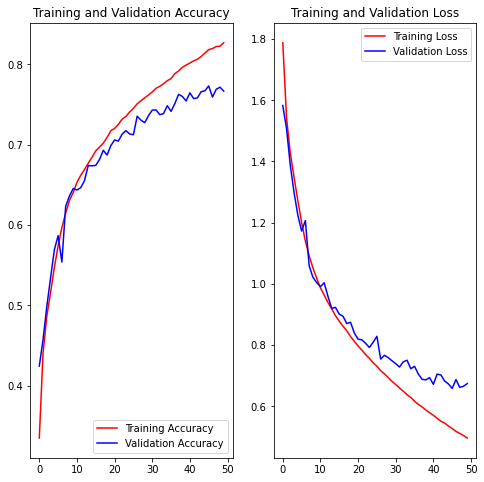

In [24]:
show_accuracy(history4)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion matrix, without normalization


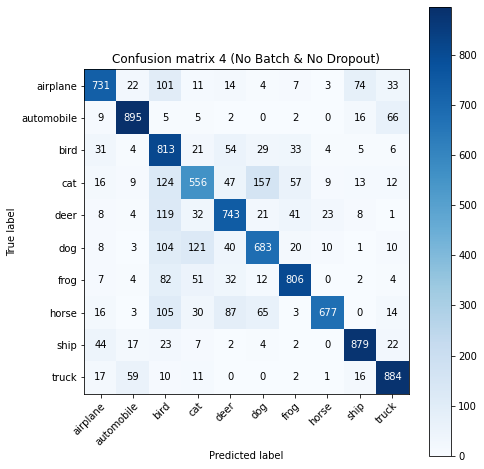

In [25]:
y_pred=model4.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix 4 (No Batch & No Dropout)')